# Importing the libraries we will be using

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


### Reading the files

In [2]:
titanictrain = pd.read_csv(r'/kaggle/input/titanic/train.csv')
titanictest = pd.read_csv(r'/kaggle/input/titanic/test.csv')

# Exploratory Data Analysis begin

In [3]:
titanictest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanictrain.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanictest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanictrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanictest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
titanictrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanictrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

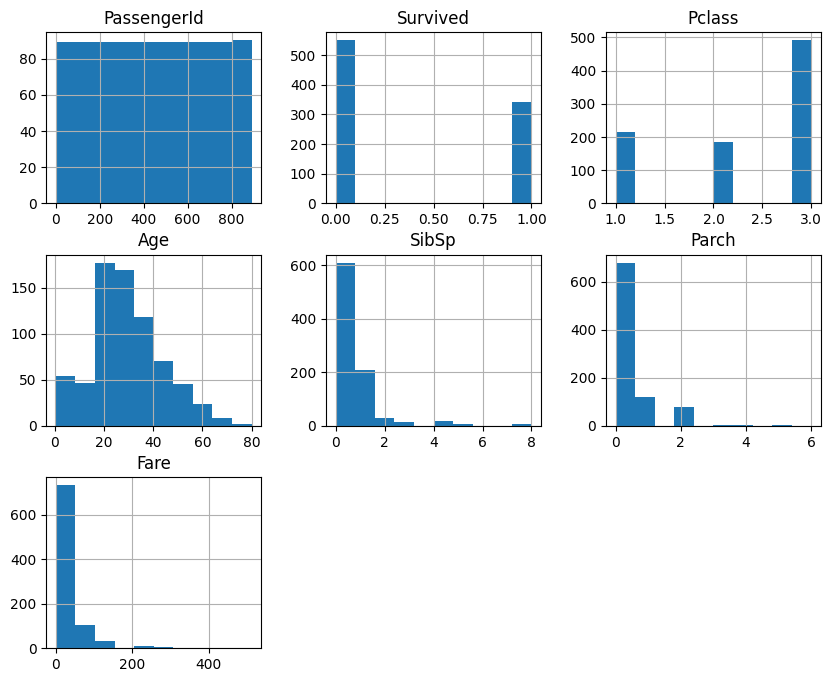

In [10]:
titanictrain.hist(figsize=(10,8))
plt.show() 

In [11]:
titanictrain['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [12]:
titanictrain.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanictest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

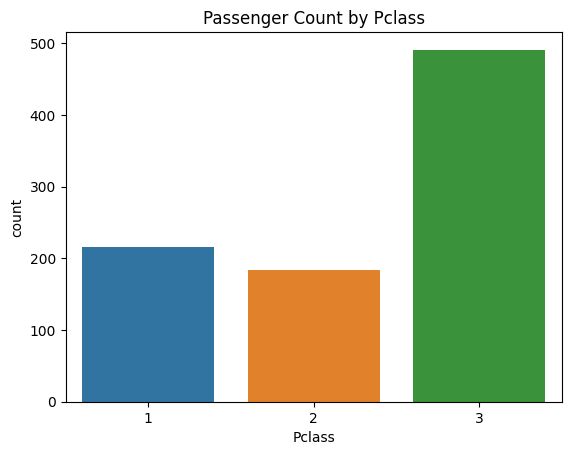

In [14]:
sns.countplot(x='Pclass', data=titanictrain)
plt.title('Passenger Count by Pclass')
plt.show()

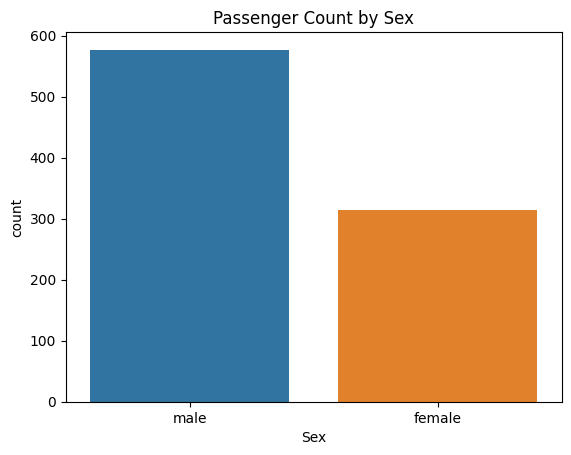

In [15]:
sns.countplot(x='Sex', data=titanictrain)
plt.title('Passenger Count by Sex')
plt.show()

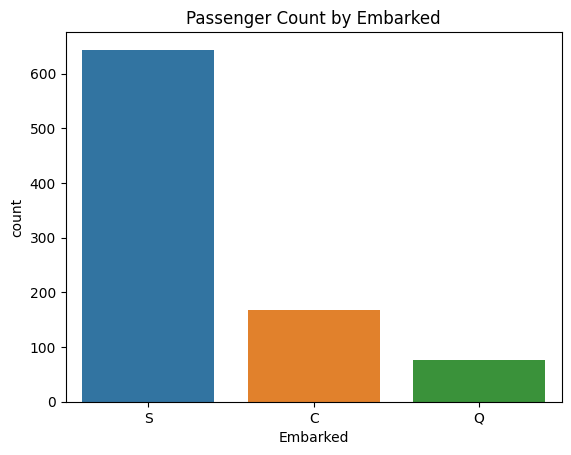

In [16]:
sns.countplot(x='Embarked', data=titanictrain)
plt.title('Passenger Count by Embarked')
plt.show()

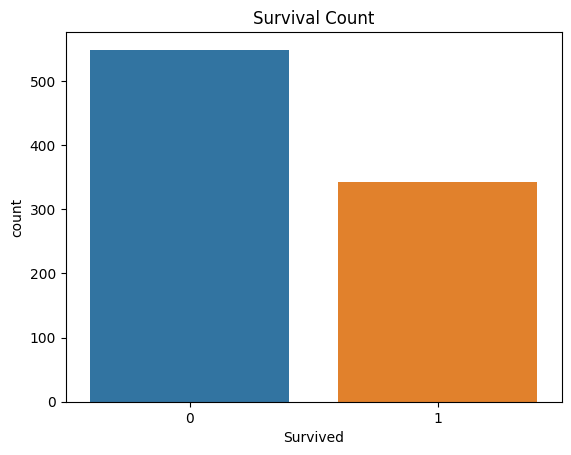

In [17]:
# Countplot for 'Survived'
sns.countplot(x='Survived', data=titanictrain)
plt.title('Survival Count')
plt.show()

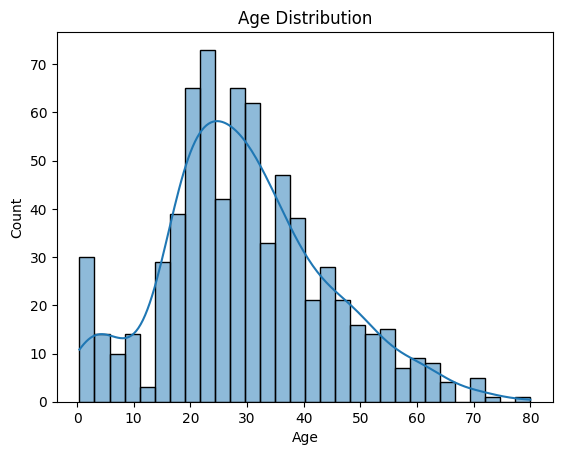

In [18]:
# Histogram for 'Age'
sns.histplot(titanictrain['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

In [19]:
# Cross-tabulation between 'Pclass' and 'Survived'
pclass_survived_cross = pd.crosstab(titanictrain['Pclass'], titanictrain['Survived'], margins=True, margins_name="Total")

# Display the cross-tabulation
print(pclass_survived_cross)

Survived    0    1  Total
Pclass                   
1          80  136    216
2          97   87    184
3         372  119    491
Total     549  342    891


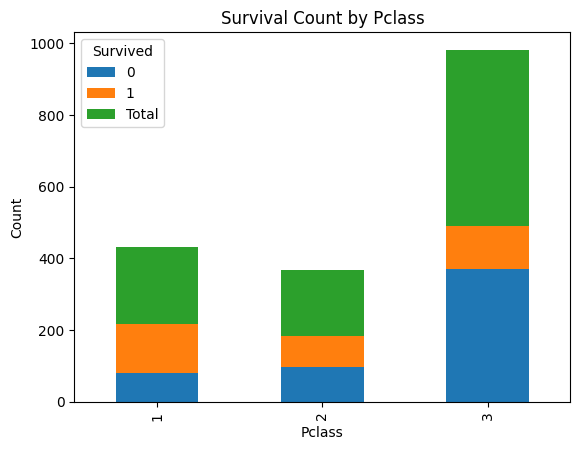

In [20]:
# Stacked bar plot for 'Pclass' and 'Survived'
pclass_survived_cross.drop('Total').plot(kind='bar', stacked=True)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [21]:
# Create a new column indicating whether Cabin information is available or not
titanictrain['Cabin_Status'] = titanictrain['Cabin'].apply(lambda x: 'Available' if pd.notna(x) else 'Not Available')

# Cross-tabulation between 'Survived' and 'Cabin_Status'
survived_cabin_cross = pd.crosstab(titanictrain['Survived'], titanictrain['Cabin_Status'], margins=True, margins_name="Total")

# Display the cross-tabulation
print(survived_cabin_cross)

Cabin_Status  Available  Not Available  Total
Survived                                     
0                    68            481    549
1                   136            206    342
Total               204            687    891


In [22]:
titanictest['Cabin_Status'] = titanictest['Cabin'].apply(lambda x: 'Available' if pd.notna(x) else 'Not Available')

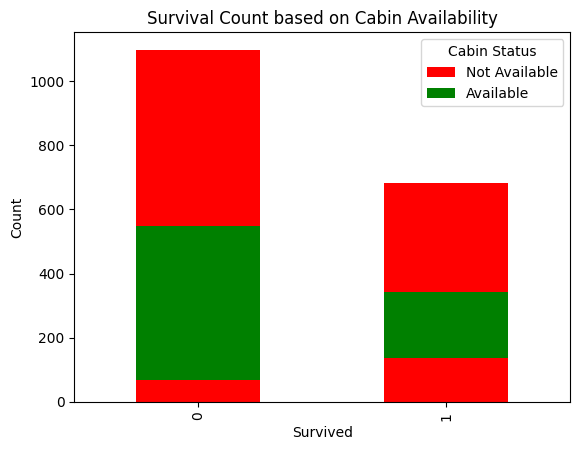

In [23]:
# Stacked bar plot
survived_cabin_cross.drop('Total').plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Count based on Cabin Availability')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Cabin Status', loc='upper right', labels=['Not Available', 'Available'])
plt.show()

In [24]:
fare_bins = [0, 50, 100, 150, 200, 250, 300, 400, 500, float('inf')]
fare_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-400', '401-500', '500+']

titanictrain['Fare_Category'] = pd.cut(titanictrain['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# Cross-tabulation between 'Fare_Category' and 'Survived'
fare_survived_cross = pd.crosstab(titanictrain['Fare_Category'], titanictrain['Survived'], margins=True, margins_name="Total")

# Display the cross-tabulation
print(fare_survived_cross)

Survived         0    1  Total
Fare_Category                 
0-50           497  233    730
51-100          38   70    108
101-150          5   19     24
151-200          3    6      9
201-250          4    7     11
251-300          2    4      6
500+             0    3      3
Total          549  342    891


In [25]:
fare_bins = [0, 50, 100, 150, 200, 250, 300, 400, 500, float('inf')]
fare_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-400', '401-500', '500+']

titanictest['Fare_Category'] = pd.cut(titanictest['Fare'], bins=fare_bins, labels=fare_labels, right=False)

In [26]:
# Cross-tabulation between 'Sex' and 'Survived'
sex_survived_cross = pd.crosstab(titanictrain['Sex'], titanictrain['Survived'], margins=True, margins_name="Total")

# Display the cross-tabulation
print(sex_survived_cross)

Survived    0    1  Total
Sex                      
female     81  233    314
male      468  109    577
Total     549  342    891


In [27]:
titanictrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Status,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Available,0-50
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Available,51-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Not Available,0-50
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Available,51-100
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Available,0-50


In [28]:
titanictest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Status,Fare_Category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Not Available,0-50
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Not Available,0-50
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Not Available,0-50
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Not Available,0-50
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Not Available,0-50


# Getting the data ready for macchine learning algorithms

In [29]:
titanictrain = titanictrain.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [30]:
titanictest = titanictest.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [31]:
titanictrain.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
Cabin_Status       0
Fare_Category      0
dtype: int64

In [32]:
titanictest.isna().sum()

PassengerId       0
Pclass            0
Sex               0
Age              86
SibSp             0
Parch             0
Fare              1
Embarked          0
Cabin_Status      0
Fare_Category     1
dtype: int64

### Filling missing values

In [33]:
median_age = titanictrain['Age'].median()
titanictrain['Age'].fillna(median_age, inplace=True)


In [34]:
median_age = titanictest['Age'].median()
titanictest['Age'].fillna(median_age, inplace=True)

In [35]:
# Impute missing values for 'Fare' with the median or another suitable value
titanictest['Fare'].fillna(titanictest['Fare'].median(), inplace=True)

# Find the most frequent category in 'Fare_Category'
most_frequent_category = titanictest['Fare_Category'].mode()[0]

# Impute missing values with the most frequent category
titanictest['Fare_Category'].fillna(most_frequent_category, inplace=True)

In [36]:
titanictrain['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [37]:
titanictest['Embarked'].isna().sum()

0

In [38]:
mode_embarked = titanictrain['Embarked'].mode()[0]

# Impute missing values in 'Embarked' with the mode
titanictrain['Embarked'].fillna(mode_embarked, inplace=True)

In [39]:
titanictrain.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Cabin_Status     0
Fare_Category    0
dtype: int64

In [40]:
titanictest.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Cabin_Status     0
Fare_Category    0
dtype: int64

In [41]:
titanictrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   Cabin_Status   891 non-null    object  
 10  Fare_Category  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 71.0+ KB


In [42]:
titanictest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Sex            418 non-null    object  
 3   Age            418 non-null    float64 
 4   SibSp          418 non-null    int64   
 5   Parch          418 non-null    int64   
 6   Fare           418 non-null    float64 
 7   Embarked       418 non-null    object  
 8   Cabin_Status   418 non-null    object  
 9   Fare_Category  418 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 30.3+ KB


### Label encoding the categorical values

In [43]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Sex' and 'Embarked'
titanictrain['Sex'] = label_encoder.fit_transform(titanictrain['Sex'])
titanictrain['Embarked'] = label_encoder.fit_transform(titanictrain['Embarked'])

In [44]:
# Apply label encoding to 'Sex' and 'Embarked'
titanictest['Sex'] = label_encoder.fit_transform(titanictest['Sex'])
titanictest['Embarked'] = label_encoder.fit_transform(titanictest['Embarked'])

In [45]:
titanictrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Status,Fare_Category
0,1,0,3,1,22.0,1,0,7.2500,2,Not Available,0-50
1,2,1,1,0,38.0,1,0,71.2833,0,Available,51-100
2,3,1,3,0,26.0,0,0,7.9250,2,Not Available,0-50
3,4,1,1,0,35.0,1,0,53.1000,2,Available,51-100
4,5,0,3,1,35.0,0,0,8.0500,2,Not Available,0-50


In [46]:
titanictest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Status,Fare_Category
0,892,3,1,34.5,0,0,7.8292,1,Not Available,0-50
1,893,3,0,47.0,1,0,7.0000,2,Not Available,0-50
2,894,2,1,62.0,0,0,9.6875,1,Not Available,0-50
3,895,3,1,27.0,0,0,8.6625,2,Not Available,0-50
4,896,3,0,22.0,1,1,12.2875,2,Not Available,0-50


In [47]:
titanictrain['Fare_Category'] = label_encoder.fit_transform(titanictrain['Fare_Category'])

In [48]:
titanictest['Fare_Category'] = label_encoder.fit_transform(titanictest['Fare_Category'])

In [49]:
titanictrain['Cabin_Status'] = label_encoder.fit_transform(titanictrain['Cabin_Status'])

In [50]:
titanictest['Cabin_Status'] = label_encoder.fit_transform(titanictest['Cabin_Status'])

In [51]:
titanictrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Status,Fare_Category
0,1,0,3,1,22.0,1,0,7.2500,2,1,0
1,2,1,1,0,38.0,1,0,71.2833,0,0,6
2,3,1,3,0,26.0,0,0,7.9250,2,1,0
3,4,1,1,0,35.0,1,0,53.1000,2,0,6
4,5,0,3,1,35.0,0,0,8.0500,2,1,0


In [52]:
titanictest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Status,Fare_Category
0,892,3,1,34.5,0,0,7.8292,1,1,0
1,893,3,0,47.0,1,0,7.0000,2,1,0
2,894,2,1,62.0,0,0,9.6875,1,1,0
3,895,3,1,27.0,0,0,8.6625,2,1,0
4,896,3,0,22.0,1,1,12.2875,2,1,0


# Logistic Regression 

In [53]:

# Define features (X) and target variable (y)
X = titanictrain.drop(['Survived'], axis=1)  # Exclude non-feature columns
y = titanictrain['Survived']

In [54]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
model = LogisticRegression(max_iter=1000)


In [57]:
# Train the model on the training set
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [58]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [59]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.45


In [60]:
# Scale the test data if you scaled the training data
X_test_scaled = scaler.transform(titanictest)


In [61]:
# Make predictions on the test data using your trained model
y_test_pred = model.predict(X_test_scaled)

In [62]:
print(y_test_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]


In [63]:
result_df = pd.DataFrame({'PassengerId': titanictest['PassengerId'], 'Survived': y_test_pred})
print(result_df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [64]:
# Save the predictions to a CSV file
#result_df.to_csv('submission.csv', index=False)

# Random Forest Model

In [65]:
# Instantiate Random Forest model
rf_model = RandomForestClassifier(random_state=2023, max_depth=7, n_estimators=300)

In [66]:
# Train the model on the training set
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=2023)

In [67]:
# Make predictions on the test data
y_test_pred_rf = rf_model.predict(X_test_scaled)

In [68]:
# Create a DataFrame with 'PassengerId' and 'Survived_Predicted' columns
result_df_rf = pd.DataFrame({'PassengerId': titanictest['PassengerId'], 'Survived': y_test_pred_rf})

In [69]:
# Save the predictions to a CSV file
result_df_rf.to_csv('submission.csv', index=False)